<a href="https://colab.research.google.com/github/chaulnb05/computerised-voting-aus/blob/main/A2_TrafficSigns2204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tensorflow.__version__)

2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/'My Drive'/COSC2673A2/

trafficsigns_dataset.zip


In [ ]:
!cp /content/drive/'My Drive'/COSC2673A2/trafficsigns_dataset.zip .
!unzip -q -o trafficsigns_dataset.zip
!rm trafficsigns_dataset.zip
!ls


drive  __MACOSX  sample_data  trafficsigns_dataset


#**EDA**

In [ ]:
# libraries

import os
from PIL import Image

import matplotlib.pyplot as plt
import random

import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2

In [ ]:
dataset_folder = 'trafficsigns_dataset'

# List subfolders in dataset folder
subfolders = [subfolder for subfolder in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, subfolder))]

# Iterate over subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_folder, subfolder)
    print(f"Subfolder: {subfolder}")

    # List files in current subfolder
    files = os.listdir(subfolder_path)

    # Print files in current subfolder
    for file in files:
        print(f"  - {file}")


Subfolder: round
  - traveldirection
  - noparking
  - limitedtraffic
  - roundabout
  - noentry
  - trafficdirective
  - speed
  - bicycle
  - .DS_Store
Subfolder: triangle
  - warning
  - giveway
Subfolder: square
  - laneend
  - crossing
  - continue
  - .DS_Store
  - parking
Subfolder: diamond
  - rightofway
Subfolder: hex
  - stop


In [ ]:
dataset_folder = 'trafficsigns_dataset'
subfolders = ['hex', 'triangle', 'diamond', 'square', 'round']

data = []
subfolder_variables = {}

# Iterate over the main subfolders
for label in subfolders:
    subfolder_path = os.path.join(dataset_folder, label)

    # Check if the subfolder exists
    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        subfolder_contents = os.listdir(subfolder_path)
        subfolder_variables[label] = {}  # Initialize empty dictionary for sub-subfolders

        # Iterate over the sub-subfolders
        for sub_label in subfolder_contents:
            sub_subfolder_path = os.path.join(subfolder_path, sub_label)

            # Check if the sub-subfolder exists
            if os.path.exists(sub_subfolder_path) and os.path.isdir(sub_subfolder_path):
                images = []

                # Iterate over the image files in the sub-subfolder
                for filename in os.listdir(sub_subfolder_path):
                    file_path = os.path.join(sub_subfolder_path, filename)

                    # Check if the file is an image (PNG format)
                    if filename.endswith('.png'):
                        # Open the image using PIL
                        image = Image.open(file_path)

                        # Append the image to the list of images for the sub-subfolder
                        images.append(image)

                # Save the list of images for the current sub-subfolder in subfolder_variables
                subfolder_variables[label][sub_label] = images

                # Append image name (full path) and label to the data list for DataFrame creation
                for image_path in images:
                    data.append({'image name': file_path, 'label': os.path.join(label, sub_label)})

# Create a DataFrame from the list of dictionaries (data)
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,image name,label
0,trafficsigns_dataset/hex/stop/01162_00000.png,hex/stop
1,trafficsigns_dataset/hex/stop/01162_00000.png,hex/stop
2,trafficsigns_dataset/hex/stop/01162_00000.png,hex/stop
3,trafficsigns_dataset/hex/stop/01162_00000.png,hex/stop
4,trafficsigns_dataset/hex/stop/01162_00000.png,hex/stop


In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)

label
triangle/warning          695
round/noentry             375
round/speed               316
round/bicycle             285
diamond/rightofway        282
square/parking            276
round/noparking           242
triangle/giveway          231
square/continue           199
round/trafficdirective    195
round/limitedtraffic      125
round/traveldirection     124
square/laneend            118
round/roundabout           98
square/crossing            95
hex/stop                   43
Name: count, dtype: int64


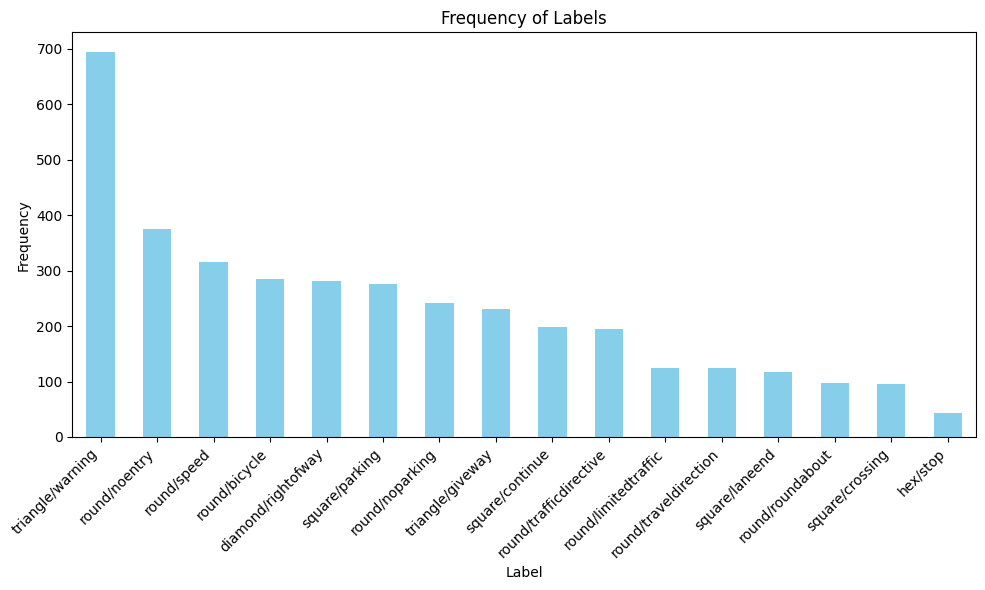

In [ ]:
# Plotting length of each label with bar chart
plt.figure(figsize=(10, 6))

# Create a bar plot
label_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
print(subfolder_variables['hex']['stop'])

[<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B47B21706D0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B47B51CFEE0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE64D60>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE64FD0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE65030>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE65090>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE650F0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE65150>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE651B0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE65210>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE65270>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE652D0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7B479EE65330>

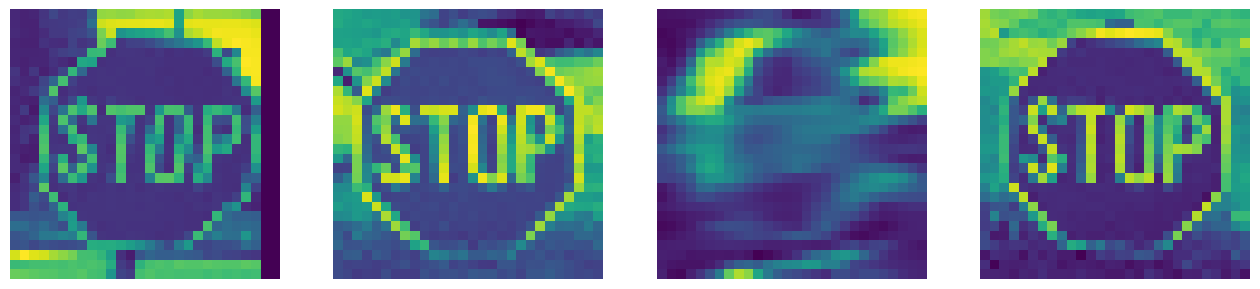

In [ ]:
def random_image(pic_list, sample_size=4):
    '''Display a random sample of images from pic_list'''
    fig = plt.gcf()
    fig.set_size_inches(16, 16)  # fig size

    # Randomly select a subset of images from pic_list
    sampled_images = random.sample(pic_list, min(sample_size, len(pic_list)))

    # Display the sampled images
    for i, img in enumerate(sampled_images):
        sp = plt.subplot(1, sample_size, i + 1)
        sp.axis('Off')
        plt.imshow(img)

    plt.show()

# show stop subfolder of hex
random_image(subfolder_variables['hex']['stop'], sample_size=4)


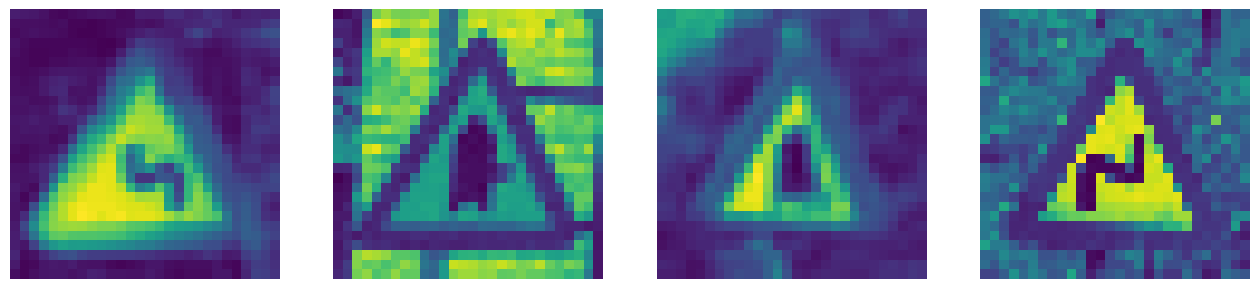

In [ ]:
# show stop subfolder of hex
random_image(subfolder_variables['triangle']['warning'], sample_size=4)

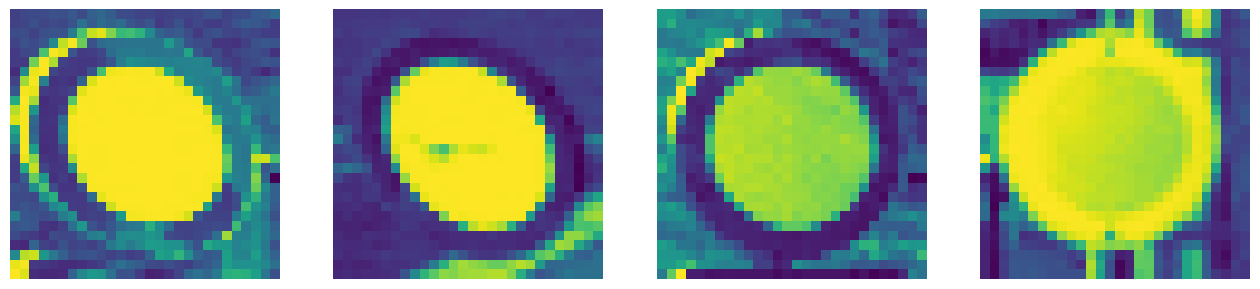

In [ ]:
# show stop subfolder of hex
random_image(subfolder_variables['round']['limitedtraffic'], sample_size=4)

In [ ]:
# double check shape of images
for i in range(len(df)):
    image_path = df.loc[i, 'image name']
    image = plt.imread(image_path)
    image_shape = image.shape
    print(f"Image at index {i}: Shape = {image_shape}")

# **Data Preprocessing**

## 1. Picture Rotation

In [ ]:
def correct_image_orientation(image_path):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]

    if height > width:
        rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(image_path, rotated_img)

def process_images_in_directory(root_dir):
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.png'):
                image_path = os.path.join(root, file)
                correct_image_orientation(image_path)



In [ ]:
root_directory = 'drive/  __MACOSX/  sample_data/  trafficsigns_dataset/'
process_images_in_directory(root_directory)

In [ ]:
ls

drive/  __MACOSX/  sample_data/  trafficsigns_dataset/


## 2. Encode Labels

In [ ]:
df['label'].unique()

array(['hex/stop', 'triangle/warning', 'triangle/giveway',
       'diamond/rightofway', 'square/laneend', 'square/crossing',
       'square/continue', 'square/parking', 'round/traveldirection',
       'round/noparking', 'round/limitedtraffic', 'round/roundabout',
       'round/noentry', 'round/trafficdirective', 'round/speed',
       'round/bicycle'], dtype=object)

In [ ]:
df[df['label']=='Basmati']

,image name,label,encode_label


In [ ]:
df[df['encode_label'].isnull()]

,image name,label,encode_label


# **Encode the images as arrays**

In [ ]:
import cv2

X = []
for image in df['image name']:
    image = cv2.imread(str(image))
    #image = augment_function(image)
    image = cv2.resize(image, (100, 100))
    #image = image/255
    X.append(image)

In [ ]:
len(X)
X[:2]

In [ ]:
len(X)

3699

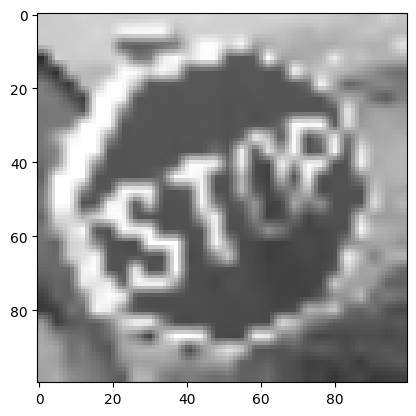

In [ ]:
plt.imshow(X[0])

# **Splitting into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train set (70%), validation set (10%), and test set (20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=45)
train_data, val_data = train_test_split(train_data, test_size=0.125, random_state=45) # So there is more training data

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2589, Val Data: 370, Test Data: 740


# **Base model**

In [ ]:
from keras import layers
import keras

# Initialise
rotator_flipper = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])

In [ ]:
model = tf.keras.Sequential([
    # Apply augmentation buy adding it to model layer
    rotator_flipper,
    tf.keras.layers.Flatten(input_shape=(28,28,3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(16)
])
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
train_data['label'] = train_data['label'].astype('str')
val_data['label'] = val_data['label'].astype('str')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image name",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image name",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

Found 2589 validated image filenames belonging to 16 classes.
Found 370 validated image filenames belonging to 16 classes.


In [ ]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

<ipython-input-117-243f5d5117d3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)


## Learning Curve

In [ ]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

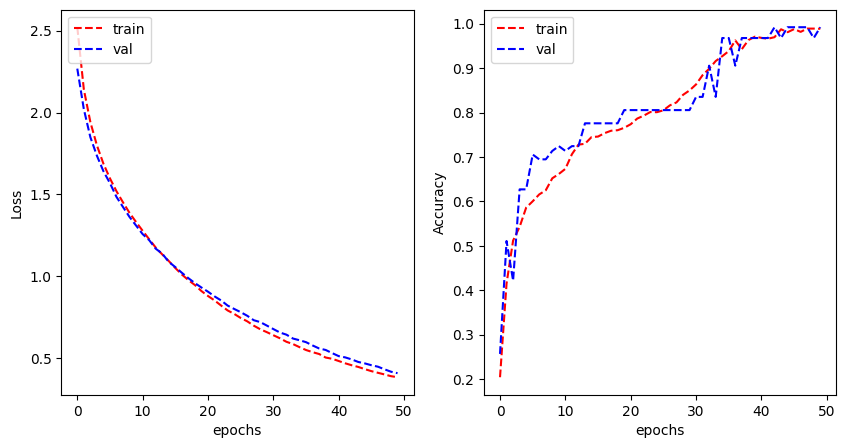

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

# **Testing final model**

In [ ]:
test_data['label'] = test_data['label'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="image name",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 16 classes.


In [ ]:
model.evaluate(test_generator)

740/740 [==============================] - 3s 4ms/step - loss: 0.4279 - categorical_accuracy: 0.9824


[0.4278627634048462, 0.9824324250221252]

# **Visualising predictions**

In [ ]:
sorted(df['label'].unique())

['diamond/rightofway',
 'hex/stop',
 'round/bicycle',
 'round/limitedtraffic',
 'round/noentry',
 'round/noparking',
 'round/roundabout',
 'round/speed',
 'round/trafficdirective',
 'round/traveldirection',
 'square/continue',
 'square/crossing',
 'square/laneend',
 'square/parking',
 'triangle/giveway',
 'triangle/warning']

In [ ]:
sign_labels = {
    'diamond/rightofway':0,
 'hex/stop':1,
 'round/bicycle':2,
 'round/limitedtraffic':3,
 'round/noentry':4,
 'round/noparking':5,
 'round/roundabout':6,
 'round/speed':7,
 'round/trafficdirective':8,
 'round/traveldirection':9,
 'square/continue':10,
 'square/crossing':11,
 'square/laneend':12,
 'square/parking':13,
 'triangle/giveway':14,
 'triangle/warning':15
}

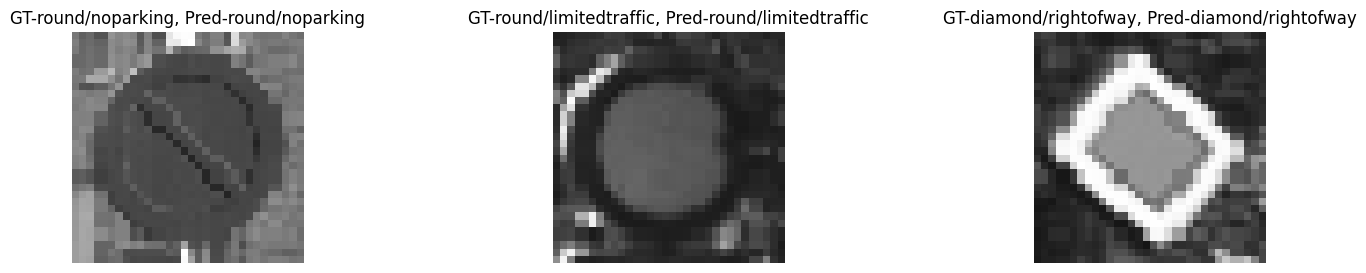

In [ ]:
import numpy as np

d_inv = {v: k for k, v in sign_labels.items()}
plt.figure(figsize=(30,3))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 4:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')